# Install the Hugging Face 'datasets' library


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is i

#Import essential libraries

In [ ]:
# Import libraries
import re
import nltk
import numpy as np
import pandas as pd
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Load the resume-job dataset from Hugging Face


In [ ]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
dataset = load_dataset("cnamuangtoun/resume-job-description-fit")
df = dataset['train'].to_pandas()

# Remove 'Potential Fit' entries
df = df[df['label'] != 'Potential Fit']

# Preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


train.csv:   0%|          | 0.00/53.4M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/15.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6241 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1759 [00:00<?, ? examples/s]


### Define a preprocessing function: lowercase, remove special characters, remove stopwords, lemmatize


In [ ]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['resume_clean'] = df['resume_text'].apply(preprocess)
df['jd_clean'] = df['job_description_text'].apply(preprocess)

# Combine resume and job description
df['combined'] = df['resume_clean'] + " " + df['jd_clean']

# Convert text to numerical features using TF-IDF (1-2 grams, 8000 features max)


In [ ]:
# Vectorization
vectorizer = TfidfVectorizer(max_features=8000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['combined'])

# Label encoding
y = df['label'].map({'Good Fit': 1, 'No Fit': 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


#SVM

In [ ]:
svc_model = LinearSVC(class_weight='balanced', max_iter=1000)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

In [ ]:
# Predictions
y_pred = svc_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy * 100:.2f}%\n")
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Fit', 'Good Fit']))
print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

✅ Accuracy: 79.40%

📊 Classification Report:
              precision    recall  f1-score   support

      No Fit       0.93      0.75      0.83       629
    Good Fit       0.63      0.88      0.74       308

    accuracy                           0.79       937
   macro avg       0.78      0.82      0.78       937
weighted avg       0.83      0.79      0.80       937

🧾 Confusion Matrix:
[[472 157]
 [ 36 272]]


#Train a Logistic Regression model


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)



LogisticRegression(class_weight='balanced', max_iter=1000)

#Evaluate Logistic Regression

✅ Accuracy: 77.48%

📊 Classification Report:
              precision    recall  f1-score   support

      No Fit       0.91      0.74      0.82       629
    Good Fit       0.61      0.84      0.71       308

    accuracy                           0.77       937
   macro avg       0.76      0.79      0.76       937
weighted avg       0.81      0.77      0.78       937



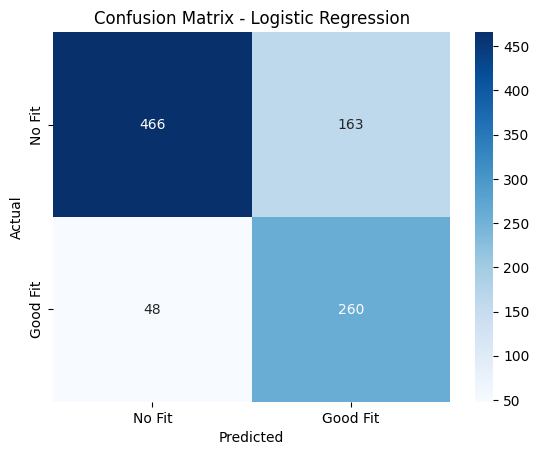

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = log_reg.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Fit', 'Good Fit']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fit', 'Good Fit'],
            yticklabels=['No Fit', 'Good Fit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Use GridSearchCV to find best Logistic Regression hyperparameters


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

# Evaluate the best model from GridSearch

✅ Accuracy: 80.26%
🔧 Best Params: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

📊 Classification Report:
              precision    recall  f1-score   support

      No Fit       0.93      0.76      0.84       629
    Good Fit       0.65      0.88      0.75       308

    accuracy                           0.80       937
   macro avg       0.79      0.82      0.79       937
weighted avg       0.84      0.80      0.81       937



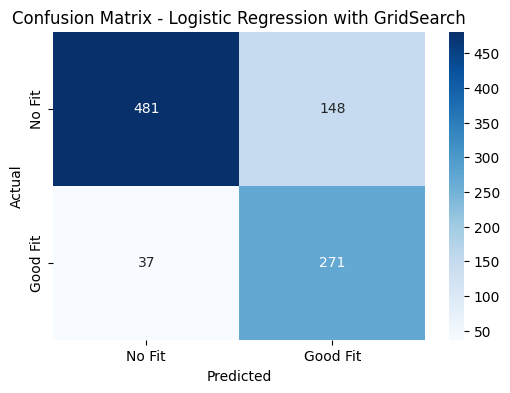

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print(f"🔧 Best Params: {grid.best_params_}")

# Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Fit', 'Good Fit']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fit', 'Good Fit'], yticklabels=['No Fit', 'Good Fit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression with GridSearch")
plt.show()

# XGBoost Classifier

✅ Accuracy: 84.20%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       629
           1       0.79      0.70      0.74       308

    accuracy                           0.84       937
   macro avg       0.83      0.81      0.82       937
weighted avg       0.84      0.84      0.84       937



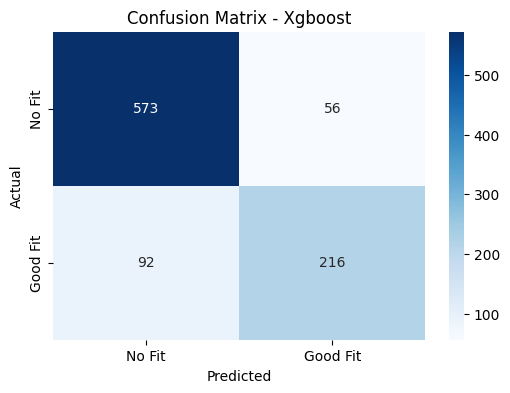

In [ ]:
!pip install xgboost --quiet
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"✅ Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fit', 'Good Fit'], yticklabels=['No Fit', 'Good Fit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Xgboost")
plt.show()

# LightGBM Classifier

In [ ]:
!pip install lightgbm --quiet
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

lgb_model = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=6)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

print(f"✅ LightGBM Accuracy: {accuracy_score(y_test, y_pred_lgb) * 100:.2f}%")
print(classification_report(y_test, y_pred_lgb))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fit', 'Good Fit'], yticklabels=['No Fit', 'Good Fit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Xgboost")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1234, number of negative: 2514


Exception ignored on calling ctypes callback function: <function _log_callback at 0x7972c1b4dd00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py", line 257, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 


Auto-choosing col-wise multi-threading, the overhead of testing was 0.733160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 560122
[LightGBM] [Info] Number of data points in the train set: 3748, number of used features: 7948
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329242 -> initscore=-0.711614
[LightGBM] [Info] Start training from score -0.711614
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Exception ignored on calling ctypes callback function: <function _log_callback at 0x7972c1b4dd00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py", line 257, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 


No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


#CatBoost Classifier

In [ ]:
!pip install catboost --quiet
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    verbose=100,
    loss_function='Logloss'
)
cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)

print(f"✅ CatBoost Accuracy: {accuracy_score(y_test, y_pred_cat) * 100:.2f}%")
print(classification_report(y_test, y_pred_cat))


0:	learn: 0.6856220	total: 1.4s	remaining: 6m 58s
100:	learn: 0.4447418	total: 2m 1s	remaining: 3m 58s
200:	learn: 0.3496360	total: 4m 17s	remaining: 2m 7s
299:	learn: 0.2551663	total: 6m 13s	remaining: 0us
✅ CatBoost Accuracy: 82.71%
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       629
           1       0.78      0.67      0.72       308

    accuracy                           0.83       937
   macro avg       0.81      0.79      0.80       937
weighted avg       0.82      0.83      0.82       937



# Voting Classifier combining Logistic Regression, Linear SVM, and LightGBM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier  # Import XGBoost
from sklearn.ensemble import VotingClassifier

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
svc = LinearSVC(class_weight='balanced')
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, eval_metric='logloss')

voting_model = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('svc', svc),
        ('xgb', xgb)
    ],
    voting='hard'  # or 'hard'
)

voting_model.fit(X_train, y_train)
y_pred_vote = voting_model.predict(X_test)

print(f"✅ Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_vote) * 100:.2f}%")
print(classification_report(y_test, y_pred_vote))


✅ Voting Classifier Accuracy: 80.79%
              precision    recall  f1-score   support

           0       0.92      0.78      0.85       629
           1       0.66      0.86      0.75       308

    accuracy                           0.81       937
   macro avg       0.79      0.82      0.80       937
weighted avg       0.83      0.81      0.81       937

